# Kernel Principal Component Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

### Create a toy dataset of 90 2-dimensional data points. The points represent iid samples of 30 points from 3 different distributions with uncorrelated, normally distributed (sd=0.1) coordinate values differing only in their mean value. The first sample should be centered on ⟨x(α)⟩1 = (−0.5, −0.2), the second  on ⟨x(α)⟩2 = (0,0.6), and the third on ⟨x(α)⟩3 = (0.5,0).

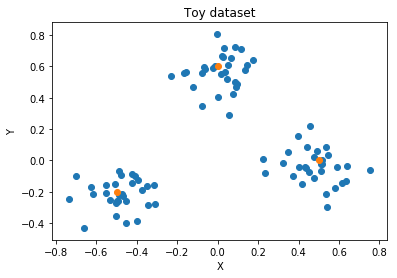

In [2]:
data = np.zeros([90, 2])
std = 0.1
COV = np.array([[std**2,0],[0,std**2]])
mean = np.array([[-0.5, -0.2], [0, 0.6], [0.5, 0]])

for i, m in enumerate(mean):
    x = np.random.multivariate_normal(mean=m,cov=COV,size = 30)
    data[i*30:(i+1)*30] = x
    
plt.scatter(data[:,0], data[:,1])
plt.scatter(mean[:,0], mean[:,1])
plt.title('Toy dataset'); plt.xlabel('X'); plt.ylabel('Y') 
plt.show()

### Apply a Kernel PCA using the RBF kernel with a suitable parameter value for the width σ of the kernel and calculate the coefficients for the representation of the eigenvectors (PCs) in the space spanned by the transformed data points.

In [3]:
def kernel(x, y, sigma):
    return math.exp(-(np.linalg.norm(x-y)**2)/(2*sigma**2))

def centering(K):
    return ((K - K.mean(axis=0)).T - K.mean(axis=1)).T + K.mean()

def decomposition(K):
    eigvals, eigvecs = np.linalg.eig(K)
    ind = np.argsort(eigvals)[::-1]
    return eigvals[ind], eigvecs[ind]

def normalization(eigvecs, eigvals):
    normEV = np.empty([90, 90])
    for i in range(90):
        normvecs = eigvecs[:, i] / np.sqrt(90*eigvals[i])
    return normvecs

p = 90 
K = np.zeros((p, p))
sigma = 0.1
for x in range(p):
    for y in range(p):
        K[x][y]= kernel(data[x], data[y], sigma)
K_centered = centering(K)
eigvals, eigvecs = decomposition(K_centered)
normvacs = normalization(eigvecs, eigvals)

/Users/agnieszka/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt


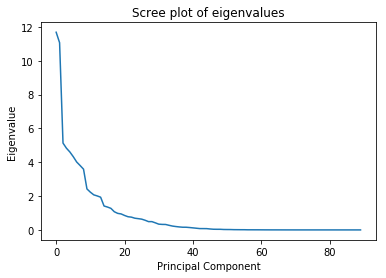

In [4]:
plt.figure()
plt.plot(eigvals.real)
plt.xlabel("Principal Component"); plt.ylabel("Eigenvalue"); plt.title("Scree plot of eigenvalues")
plt.show()

### Visualize the first 8 PCs in the 2-dimensional input space

In [5]:
# Create test data grid
sd=0.1
minX, minY = np.min(data, 0)
maxX, maxY = np.max(data, 0)
x = np.linspace(minX-sd,maxX+sd,30)
y = np.linspace(minY-sd,maxY+sd,30)
xx, yy = np.meshgrid(x,y)

In [6]:
# Apply kernel funcion to the new data
data_grid = np.c_[xx.ravel(), yy.ravel()]
K_grid = np.zeros((data_grid.shape[0], data.shape[0]))
for x in range(data_grid.shape[0]):
    for y in range(data.shape[0]):
        K_grid[x][y]= kernel(data_grid[x], data[y], sigma)
K_grid_centered = centering(K_grid)

In [7]:
# project onto the first 8 eigenvectors
vecs = eigvecs[:,:8]
projected_data = np.dot(vecs.T, K_grid_centered.T)

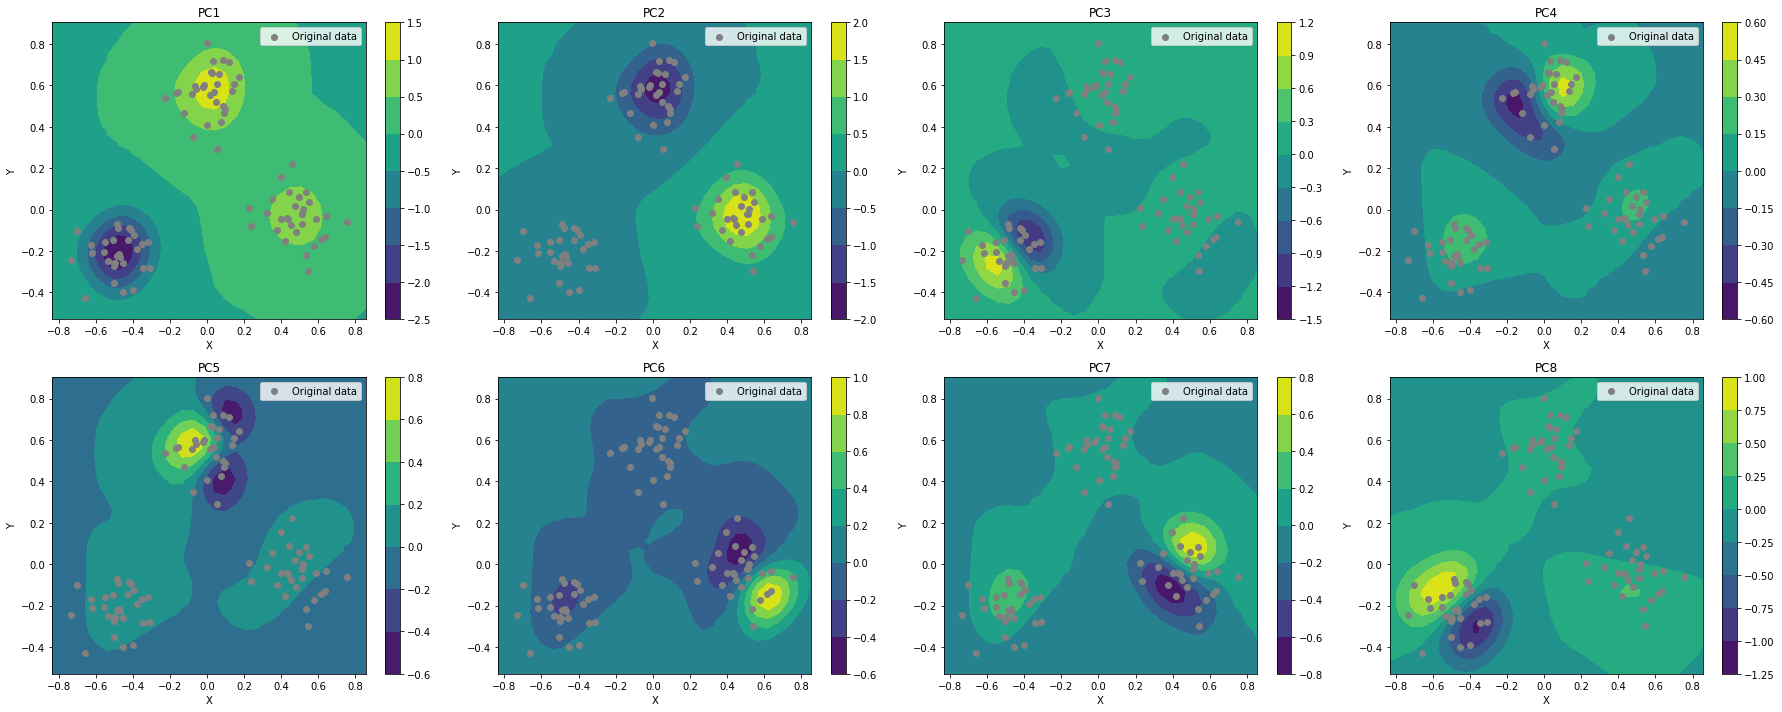

In [8]:
plt.figure(figsize=(25, 10))
for i in range(0,8):
    plt.subplot(2, 4, i+1)
    plt.contourf(xx, yy, np.reshape(projected_data.real[i, :],((30,30))))
    plt.colorbar()
    plt.scatter(data[:,0], data[:,1],c='grey',label='Original data')
    plt.xlabel('X'); plt.ylabel('Y'); plt.title('PC'+str(i+1)); plt.legend()
plt.tight_layout()
plt.show()

PC1 and PC2 separate the three clusters. PC3 - PC8 divide each cluster into two halves.

PCA is a liner method - it ca detect linear features in data and reduce the data to linear subspaces. If features do not follow linear structure Kernel PCA can be used. Kernel PCA can be applied do detect even highly non-linear features in a given dataset. Kernel PCA is suitable for feature extraction, denoising (handwritten digits, images) and dimensionality reduction.

Limitations of kernel PCA: For large datasets (N data points) big kernel matrices has to be stored (NxN) - it can become expensive